# Data Description:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

# Dataset:
The project is from a dataset from Kaggle. Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment The dataset has to be downloaded from the above Kaggle website. 

# The dataset has the following columns 
 tweet_id 
 airline_sentiment 
 airline_sentiment_confidence 
 negativereason 
 negativereason_confidence 
 airline 
 airline_sentiment_gold 
 name 
 negativereason_gold 
 retweet_count 
 text 
 tweet_coord 
 tweet_created 
 tweet_location 
 user_timezone
 negativereason_gold 
 retweet_count  text  tweet_coord  tweet_created  tweet_location  user_timezone


# Objective:
To implement the techniques learnt as a part of the course. Learning Outcomes: 
*   Basic understanding of text pre-processing.
*   What to do after text pre-processing: 
    1.   Bag of words
    2.   Tf-idf
*   Build the classification model.
*   Evaluate the Model. 

# Steps and tasks: 


## 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

     |████████████████████████████████| 245kB 21.6MB/s 
     |████████████████████████████████| 317kB 41.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81689 sha256=619a7a21ad043a6f844f2f0ad2bc96384c0d7ec2258d6140b923480ae7752fc2
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
#import label file from google drive
data = pd.read_csv("/content/drive/My Drive/Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.shape                                               # print shape of data.

(14640, 15)

In [5]:
data.describe()    #Description of data                   

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
data.info

<bound method DataFrame.info of                  tweet_id  ...               user_timezone
0      570306133677760513  ...  Eastern Time (US & Canada)
1      570301130888122368  ...  Pacific Time (US & Canada)
2      570301083672813571  ...  Central Time (US & Canada)
3      570301031407624196  ...  Pacific Time (US & Canada)
4      570300817074462722  ...  Pacific Time (US & Canada)
...                   ...  ...                         ...
14635  569587686496825344  ...                         NaN
14636  569587371693355008  ...                         NaN
14637  569587242672398336  ...                         NaN
14638  569587188687634433  ...  Eastern Time (US & Canada)
14639  569587140490866689  ...                         NaN

[14640 rows x 15 columns]>

## 2. Understand of data-columns: (5 Marks)
a. Drop all other columns except “text” and “airline_sentiment”.

b. Check the shape of data.

c. Print first 5 rows of data.

In [7]:
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
data=data[['text','airline_sentiment']]
data.shape

(14640, 2)

In [9]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


## 3. Text pre-processing: Data preparation. (20 Marks)¶
a. Html tag removal.

b. Tokenization.

c. Remove the numbers.

d. Removal of Special Characters and Punctuations.

e. Conversion to lowercase.

f. Lemmatize or stemming.

g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)

h. Print first 5 rows of data after pre-processing.

In [10]:
#remove html tag
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [11]:
#Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
import contractions 
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [12]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [13]:
# Tokenization of data
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
data.head()  

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [15]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 

In [16]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


# 4. Vectorization: (10 Marks)
a. Use CountVectorizer.

In [17]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [18]:
data_features.shape

(14640, 2000)

In [19]:
data_features[0]

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


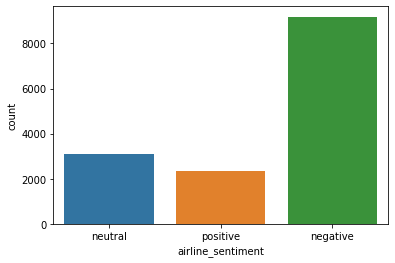

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data['airline_sentiment'])

In [22]:
df = data.groupby('airline_sentiment').nunique()

In [23]:
print(df)

                   text
airline_sentiment      
negative           9074
neutral            3018
positive           2201


In [24]:
#convert airline_sentiment to numric values 

data['airline_sentiment'] = data['airline_sentiment'].map(lambda x: {"negative":0, "neutral":1, "positive":2}.get(x))
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,airline_sentiment
0,virginamerica dhepburn say,1
1,virginamerica plus add commercials experience tacky,2
2,virginamerica not today must mean need take another trip,1
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,0
4,virginamerica really big bad thing,0


In [25]:
labels = data['airline_sentiment']
labels = labels.astype('int')

# 5. Fit and evaluate model using countvectorizer. (6 Marks)

In [26]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
for X in [5,10,20,50,100,200,500]:
    rfcl = RandomForestClassifier(n_estimators = X, random_state=1,max_features=10)
    rfcl = rfcl.fit(X_train, y_train)
    y_predict = rfcl.predict(X_test)
    print(rfcl.score(X_test, y_test))
###Try changen_estimator and compare the socre, it looks like n_estimator = 100 will be good if not overfitting

0.7229052823315119
0.7563752276867031
0.773224043715847
0.7773224043715847
0.7802823315118397
0.7814207650273224
0.7839253187613844


In [28]:
for Y in [2,4,6,8,10,12,14,16,18,20]:
    rfcl = RandomForestClassifier(n_estimators = 500, random_state=1, max_features = Y)
    rfcl = rfcl.fit(X_train, y_train)
    y_predict = rfcl.predict(X_test)
    print(rfcl.score(X_test, y_test))
#Try change max_feature, looks like max_feature = 8 is a good option

0.7784608378870674
0.7811930783242259
0.7843806921675774
0.7866575591985429
0.7839253187613844
0.7836976320582878
0.782103825136612
0.7823315118397086
0.7773224043715847
0.7782331511839709


In [29]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=8)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
0.7469945355191256


In [30]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


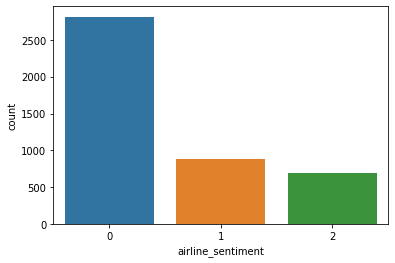

In [31]:
sns.countplot(y_test)

In [32]:
y_test.value_counts()

0    2814
1     884
2     694
Name: airline_sentiment, dtype: int64

[[2647  133   34]
 [ 411  416   57]
 [ 197  105  392]]


Text(0.5, 1.0, 'Confusion matrix using Countvectorizer and RandomForestclassifier')

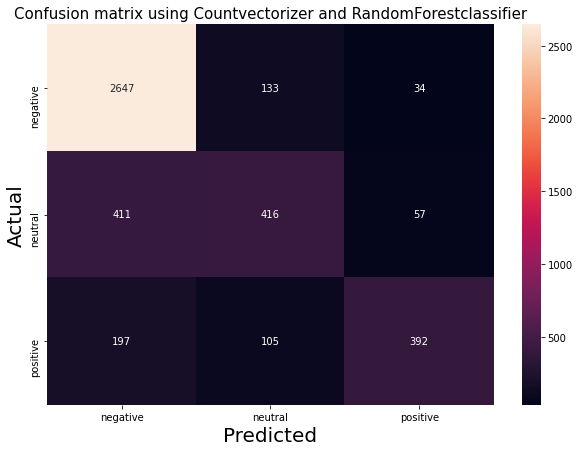

In [33]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
x_axis_labels = ['negative','neutral','positive'] # labels for x-axis
y_axis_labels = ['negative','neutral','positive'] # labels for y-axis

sns.heatmap(df_cm, annot=True, fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels
           )
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Actual",fontsize=20)
plt.title("Confusion matrix using Countvectorizer and RandomForestclassifier", fontsize =15)

# 4. Vectorization: (10 Marks)
b. Use TfidfVectorizer.

In [34]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

# 5. Fit and evaluate model using TfidfVectorizer. (6 Marks)¶

In [36]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

#forest = RandomForestClassifier(n_estimators=100, n_jobs=4)
forest = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=8)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
0.7386612021857923


In [37]:
result = forest.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix using TfidfVectorizer and RandomForestclassifier')

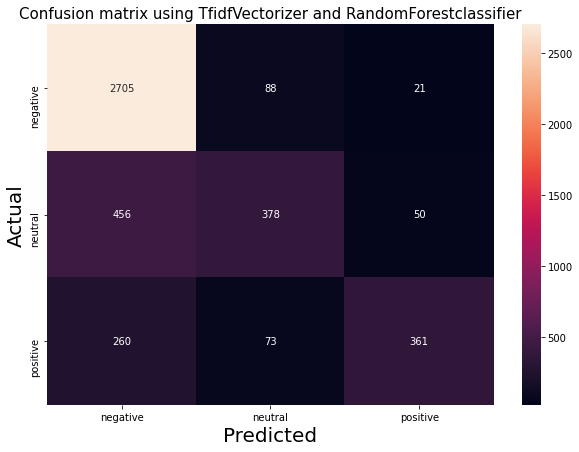

In [38]:

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
x_axis_labels = ['negative','neutral','positive'] # labels for x-axis
y_axis_labels = ['negative','neutral','positive'] # labels for y-axis

sns.heatmap(df_cm, annot=True, fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels
           )
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Actual",fontsize=20)
plt.title("Confusion matrix using TfidfVectorizer and RandomForestclassifier", fontsize =15)

# Decision trees

In [39]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [40]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [41]:
print("The actual depth of the decison tree is:", dTree.tree_.max_depth)
#Print out the actual depth of the tree

The actual depth of the decison tree is: 241


In [42]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))
#score of the descison tree

0.9927790788446527
0.6999089253187614


In [43]:
result = dTree.predict(X_test)

In [44]:
dTree_score=dTree.score(X_test, y_test)

Text(0.5, 1.0, 'Confusion matrix using TfidfVectorizer and decision trees')

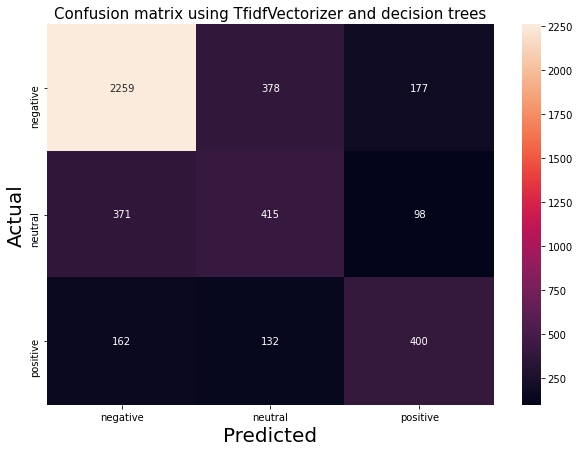

In [45]:
conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
x_axis_labels = ['negative','neutral','positive'] # labels for x-axis
y_axis_labels = ['negative','neutral','positive'] # labels for y-axis

sns.heatmap(df_cm, annot=True, fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels
           )
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Actual",fontsize=20)
plt.title("Confusion matrix using TfidfVectorizer and decision trees", fontsize =15)

# Reducing over fitting (Regularization)


In [46]:
for X in [10,20,30,40,50,60,70,80,90,100,200]:
   dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = X, random_state=1)
   dTreeR.fit(X_train, y_train)
   print(dTreeR.score(X_train, y_train))
   print(dTreeR.score(X_test, y_test))
#Set the max depth of the decision tree to be 10 - 200 and take a glimpse of the model score
#Looks like the max_detph = 50 would overall perform better than others

0.7410226385636222
0.711976320582878
0.8045472287275566
0.7251821493624773
0.8578259172521467
0.7213114754098361
0.8912958626073381
0.7215391621129326
0.920472287275566
0.7163023679417122
0.9393052302888368
0.7190346083788707
0.9481850117096019
0.7153916211293261
0.9583333333333334
0.7103825136612022
0.9627244340359095
0.7067395264116576
0.9679937548790007
0.7078779599271403
0.9889734582357533
0.6983151183970856


In [47]:
#get the performance matrix for decision tree with a max_depth = 40
dTree2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 80, random_state=1)
dTree2.fit(X_train, y_train)
print(dTree2.score(X_train, y_train))
dt2_score=dTree2.score(X_test, y_test)
print(dt2_score)


0.9583333333333334
0.7103825136612022


In [48]:
result = dTree2.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix using TfidfVectorizer and improved decision trees')

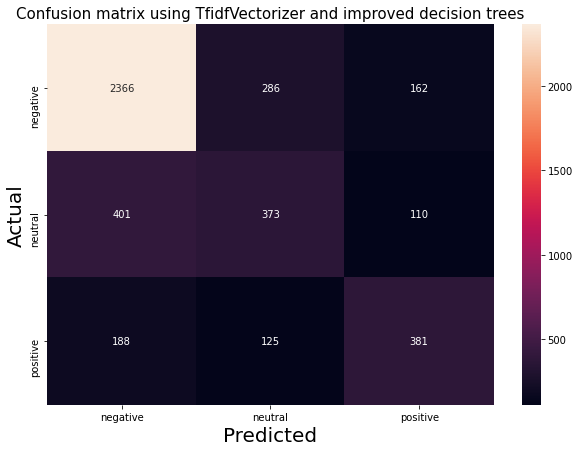

In [49]:
conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
x_axis_labels = ['negative','neutral','positive'] # labels for x-axis
y_axis_labels = ['negative','neutral','positive'] # labels for y-axis

sns.heatmap(df_cm, annot=True, fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels
           )
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Actual",fontsize=20)
plt.title("Confusion matrix using TfidfVectorizer and improved decision trees", fontsize =15)

## Ensemble Learning - Bagging

In [50]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=100,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


In [61]:
y_predict = bgcl.predict(X_test)
bagging_score=bgcl.score(X_test , y_test)
print(bagging_score)

0.7604735883424408


In [51]:
result = y_predict

Text(0.5, 1.0, 'Confusion matrix using TfidfVectorizer and bagging')

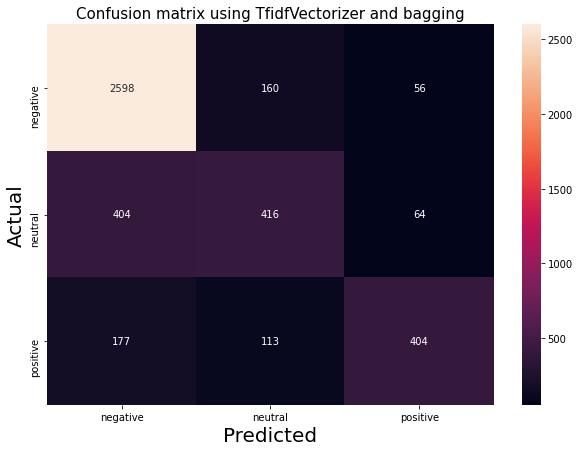

In [52]:
conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
x_axis_labels = ['negative','neutral','positive'] # labels for x-axis
y_axis_labels = ['negative','neutral','positive'] # labels for y-axis

sns.heatmap(df_cm, annot=True, fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels
           )
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Actual",fontsize=20)
plt.title("Confusion matrix using TfidfVectorizer and bagging", fontsize =15)

## Ensemble Learning - AdaBoosting


In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
for X in [5,10,20,50,100,200,500]:
    abcl = AdaBoostClassifier(n_estimators=X, random_state=1)
    abcl = abcl.fit(X_train, y_train)
    y_predict = abcl.predict(X_test)
    print(abcl.score(X_test , y_test))
#Try changen_estimator and compare the socre, it looks like n_estimator = 200 will be good if not overfitting

0.6908014571948998
0.7008196721311475
0.7190346083788707
0.7522768670309654
0.7602459016393442
0.7654826958105647
0.7543260473588342


In [55]:
abcl = AdaBoostClassifier(n_estimators=200 , random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

In [56]:
y_predict = abcl.predict(X_test)
ada_score=abcl.score(X_test , y_test)
print(ada_score)

0.7654826958105647


In [57]:
result = y_predict
result

array([2, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Confusion matrix using TfidfVectorizer and AdaBoosting')

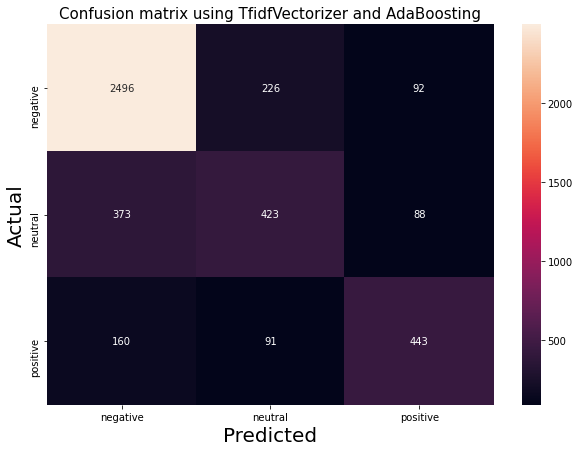

In [58]:
conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
x_axis_labels = ['negative','neutral','positive'] # labels for x-axis
y_axis_labels = ['negative','neutral','positive'] # labels for y-axis

sns.heatmap(df_cm, annot=True, fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels
           )
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Actual",fontsize=20)
plt.title("Confusion matrix using TfidfVectorizer and AdaBoosting", fontsize =15)

## Ensemble Learning - GradientBoost

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
for X in [5,10,20,50,100,200,500]:
    gbcl = GradientBoostingClassifier(n_estimators = X,random_state=1)
    gbcl = gbcl.fit(X_train, y_train)
    y_predict = gbcl.predict(X_test)
    print(gbcl.score(X_test, y_test))
##Try changen_estimator and compare the socre, it looks like n_estimator = 500 will be best if not overfitting

0.6705373406193078
0.691712204007286
0.7133424408014571
0.7399817850637522
0.7611566484517304
0.7704918032786885
0.7793715846994536


In [60]:
gbcl = GradientBoostingClassifier(n_estimators = 500,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
result = gbcl.predict(X_test)
gbc1_score=gbcl.score(X_test, y_test)


Text(0.5, 1.0, 'Confusion matrix using TfidfVectorizer and GradientBoost')

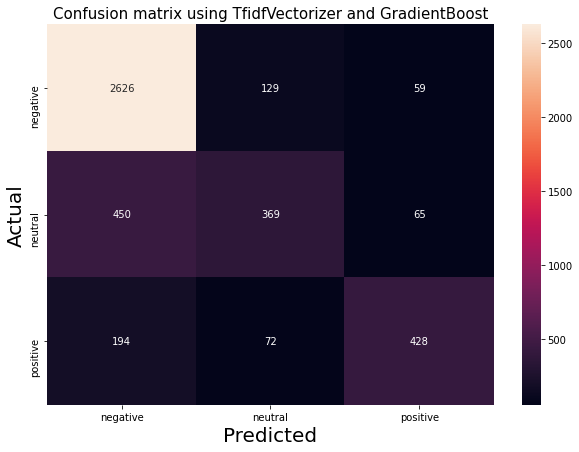

In [62]:
conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
x_axis_labels = ['negative','neutral','positive'] # labels for x-axis
y_axis_labels = ['negative','neutral','positive'] # labels for y-axis

sns.heatmap(df_cm, annot=True, fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels
           )
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Actual",fontsize=20)
plt.title("Confusion matrix using TfidfVectorizer and GradientBoost", fontsize =15)

# Try neural networks 

In [63]:
print(type(X_train))

<class 'numpy.ndarray'>


In [64]:
y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [126]:
#import necesary libraries for neural network
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [133]:
X = data_features.astype(float)
Y = labels

In [134]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [139]:

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=2000, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [140]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [141]:
kfold = KFold(n_splits=10, shuffle=True)

In [142]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

KeyboardInterrupt: ignored

# Build an improved neural network model

In [89]:
#Construct an improved model
model_improved = Sequential()
model_improved.add(Dense(512, input_shape = (2000,), activation = 'elu'))
model_improved.add(Dense(64, activation = 'relu'))## second hidden layer
model_improved.add(Dense(3, activation = 'sigmoid'))## Add an output
sgd = optimizers.Adam(lr = 0.001)
model_improved.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model_improved.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               1024512   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,057,409
Trainable params: 1,057,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [91]:
#Train the improved model
model_improved.fit(X_train, y_train, batch_size = 100, epochs = 12, verbose = 1)

Epoch 1/12
103/103 [==============================] - 0s 3ms/step - loss: 6.4595e-08 - accuracy: 0.4757
Epoch 2/12
103/103 [==============================] - 0s 3ms/step - loss: 6.4595e-08 - accuracy: 0.4757
Epoch 3/12
103/103 [==============================] - 0s 3ms/step - loss: 6.4595e-08 - accuracy: 0.4757
Epoch 4/12
103/103 [==============================] - 0s 3ms/step - loss: 6.4595e-08 - accuracy: 0.4757
Epoch 5/12
103/103 [==============================] - 0s 3ms/step - loss: 6.4595e-08 - accuracy: 0.4757
Epoch 6/12
103/103 [==============================] - 0s 3ms/step - loss: 6.4595e-08 - accuracy: 0.4757
Epoch 7/12
103/103 [==============================] - 0s 3ms/step - loss: 6.4595e-08 - accuracy: 0.4757
Epoch 8/12
103/103 [==============================] - 0s 3ms/step - loss: 6.4595e-08 - accuracy: 0.4757
Epoch 9/12
103/103 [==============================] - 0s 2ms/step - loss: 6.4595e-08 - accuracy: 0.4757
Epoch 10/12
103/103 [==============================] - 0s 3ms/st

In [92]:
#Evaluate the improved model
X_test = preprocessing.normalize(X_test)
results = model_improved.evaluate(X_test, y_test)
print(model_improved.metrics_names)
print(results)
Y_pred_cls = model_improved.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model_improved.evaluate(X_test,y_test)[1]))

138/138 [==============================] - 0s 2ms/step - loss: 6.1667e-08 - accuracy: 0.4656
['loss', 'accuracy']
[6.166747112956728e-08, 0.465619295835495]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
138/138 [==============================] - 0s 2ms/step - loss: 6.1667e-08 - accuracy: 0.4656
Accuracy Model1 (Dropout): 0.465619295835495


# 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

The following steps are taken to pre-process the data:

1, Remove HTML tag

2, Replace contractions in string

3, Remove numbers

4, Tokenization of data

5, Normalize the text (remove non-ascii, convert to lower case, remove punctuation, remove stop works, and lemmatize

6, Countvectorizer vs Tdidfvectorizer two mechanisms perform similarly using Random Forest classifier

Use larger number for "Max_features" in Vectorizer can improve accuray, but more time consuming

Various ensemble models have been tried and are perform similar to RandomForest (~75% accuracy)


ANN models are attempted and are performing poorer than Random Forest model

